In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
all_files = glob.glob("results.*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
#df = pd.read_csv('results.csv')}

In [118]:
df_accuracy = df.groupby(['query_size', 'tau']).correct.sum().reset_index(drop=False)
df_payload = df.groupby(['query_size', 'tau']).payload_size.mean().reset_index(drop=False)

In [119]:
df_accuracy.correct = df_accuracy.correct / 40

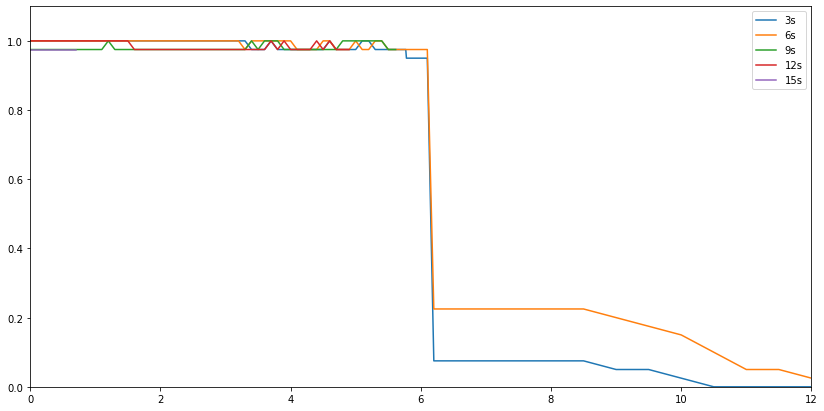

In [120]:
plt.figure(figsize=(14, 7))
for sz in [3, 6, 9, 12, 15]:
    dfx = df_accuracy[df_accuracy.query_size==sz]
    plt.plot(dfx.tau, dfx.correct, label='%ss' % sz)
plt.xlim((0, 12))
plt.ylim((0, 1.1))
plt.legend()
plt.show()

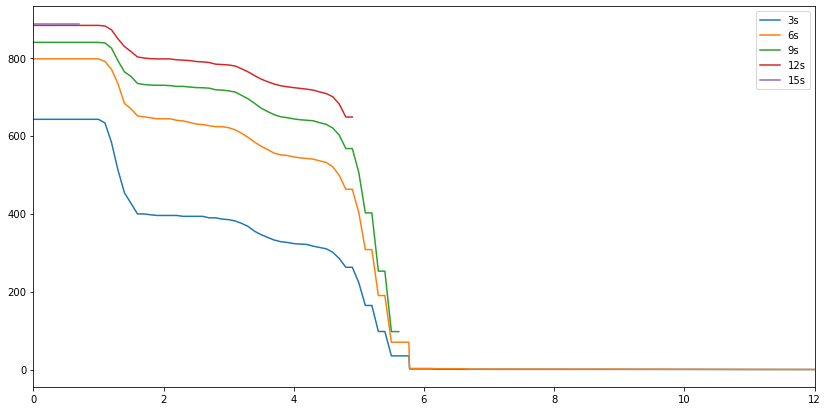

In [121]:
plt.figure(figsize=(14, 7))
for sz in [3, 6, 9, 12, 15]:
    dfx = df_payload[df_payload.query_size==sz]
    plt.plot(dfx.tau, dfx.payload_size, label='%ss' % sz)
plt.xlim((0, 12))
plt.legend()
plt.show()